In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [2]:
claims = pd.read_csv(r'C:\Users\admin\Downloads\HWA DS Track Technical Assessment\Nitika\HWA-Brovsi-WSA-Claims-Validated.csv')

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
claims.describe()

,EMP_ID,FLEXBEN_TYPE,CLM_YR,CLM_AMT,CLM.STAT,REIMB_YR,RISK
count,36772.00000,20014.000000,36772.000000,36772.000000,36772.0,36772.000000,36772.000000
mean,6564.23129,4.208954,2017.383444,187.416632,3.0,2017.499755,0.201403
std,2957.92423,1.981100,0.593205,183.872501,0.0,0.500007,0.401054
min,1380.00000,1.000000,2016.000000,0.200000,3.0,2017.000000,0.000000
25%,4025.75000,3.000000,2017.000000,34.000000,3.0,2017.000000,0.000000
50%,6724.50000,4.000000,2017.000000,100.000000,3.0,2017.000000,0.000000
75%,9248.00000,6.000000,2018.000000,385.000000,3.0,2018.000000,0.000000
max,11900.00000,8.000000,2018.000000,500.000000,3.0,2018.000000,1.000000


Text(0.5,0,'CLM_AMT')

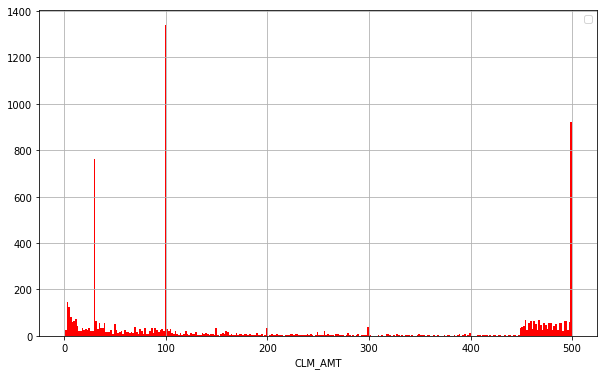

In [4]:
plt.figure(figsize=(10,6))
claims[claims['RISK']==1]['CLM_AMT'].hist(color='red', bins=300)
# loans['CLM_AMT'].hist(color='red', bins=30)
# loans[loans['RISK']==0]['CLM_AMT'].hist(color='green', bins=30)

# loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
#                                               bins=30,label='Credit.Policy=1')
# loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
#                                               bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('CLM_AMT')

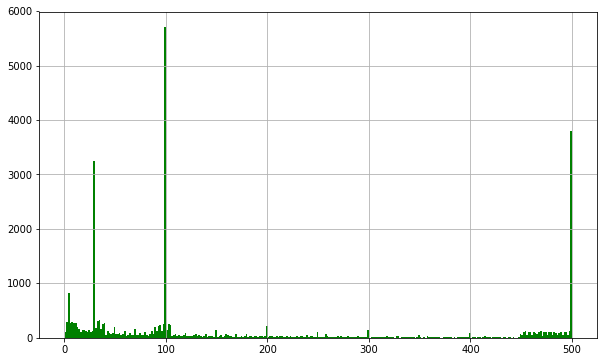

In [5]:
plt.figure(figsize=(10,6))
# loans[loans['RISK']==1]['CLM_AMT'].hist(color='red', bins=30)
# loans['CLM_AMT'].hist(color='red', bins=30)
claims[claims['RISK']==0]['CLM_AMT'].hist(color='green', bins=300)

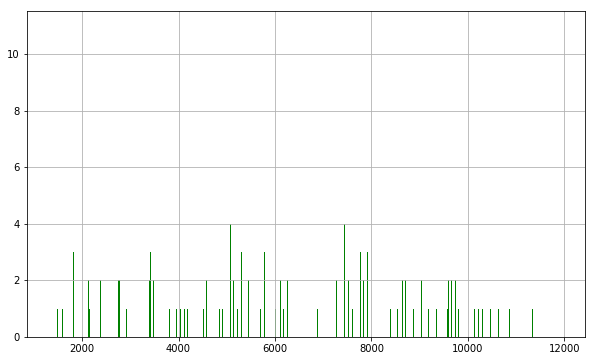

In [6]:
plt.figure(figsize=(10,6))
# loans[loans['RISK']==1]['CLM_AMT'].hist(color='red', bins=30)
# loans['CLM_AMT'].hist(color='red', bins=30)

claims[claims['RISK']==1]['EMP_ID'].hist(color='green', bins=40000)

In [7]:
import pandasql as ps
table1 = pd.DataFrame([[1234, 'Customer A', '123 Street', np.nan],
               [1234, 'Customer A', np.nan, '333 Street'],
               [1233, 'Customer B', '444 Street', '333 Street'],
              [1233, 'Customer B', '444 Street', '666 Street']], columns=
['ID', 'Customer', 'Billing Address', 'Shipping Address'])

q1 = """SELECT ID FROM table1 """

print(ps.sqldf(q1, locals()))

     ID
0  1234
1  1234
2  1233
3  1233


In [8]:
q1 = """SELECT COUNT (DISTINCT EMP_ID)
  FROM claims where RISK == 1"""

print(ps.sqldf(q1, locals()))

   COUNT (DISTINCT EMP_ID)
0                     4371


In [9]:
q1 = """SELECT COUNT (*)
  FROM claims where RISK == 1"""

print(ps.sqldf(q1, locals()))

   COUNT (*)
0       7406


In [10]:
claims['days'] = pd.to_datetime(claims['CLM_DT'], format='%d/%m/%y') - pd.to_datetime(claims['RCPT_DT'], format='%d/%m/%y')
claims['days'] = claims['days']/dt.timedelta(days=1)

# sns.pairplot(loans[['EMP_ID', 'days', 'FLEXBEN_TYPE', 'CLM_AMT', 'RISK']],hue='RISK')

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


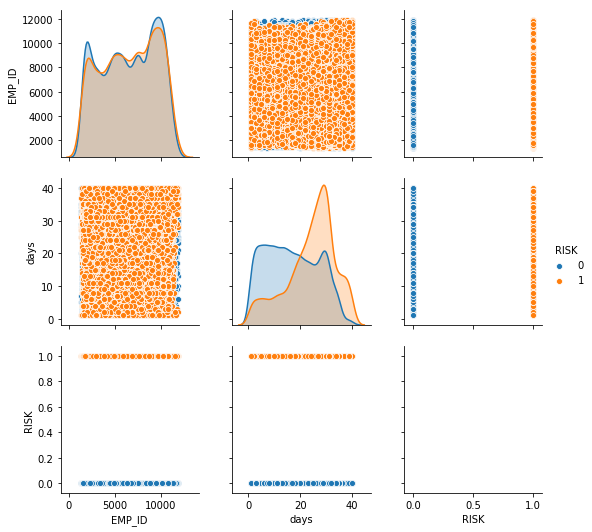

In [12]:
sns.pairplot(claims[['EMP_ID', 'days','RISK']],hue='RISK')

In [13]:
pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')

datetime.datetime(1300, 1, 1, 0, 0)

In [14]:
pd.to_datetime('4/11/16', format='%d/%m/%y')

Timestamp('2016-11-04 00:00:00')

In [15]:
days = pd.to_datetime('4/4/16', format='%d/%m/%y') - pd.to_datetime('6/4/16', format='%d/%m/%y')

In [16]:
type(days/dt.timedelta(days=1))


float

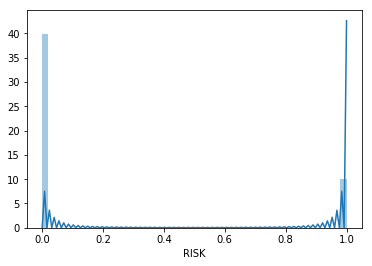

In [17]:
# sns.distplot(loans['days'])
sns.distplot(claims['RISK'])

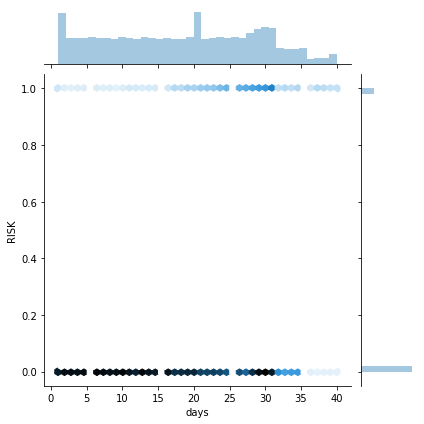

In [18]:
sns.jointplot(x='days',y='RISK',data=claims,kind='hex')

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


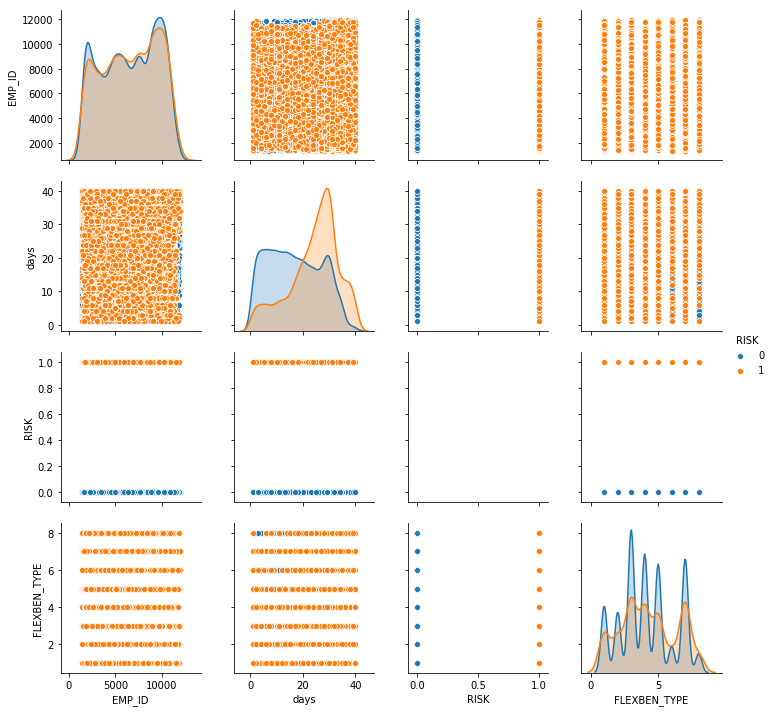

In [19]:
sns.pairplot(claims[['EMP_ID', 'days','RISK', 'FLEXBEN_TYPE']],hue='RISK')

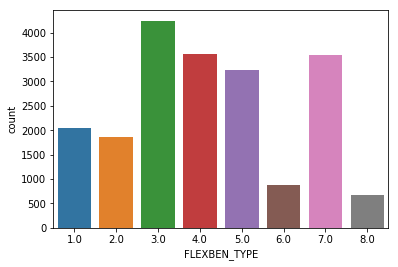

In [20]:
sns.countplot('FLEXBEN_TYPE', data=claims)

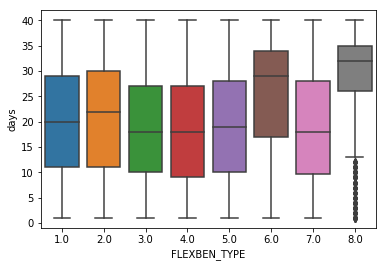

In [21]:
sns.boxplot(x='FLEXBEN_TYPE', y='days', data=claims)

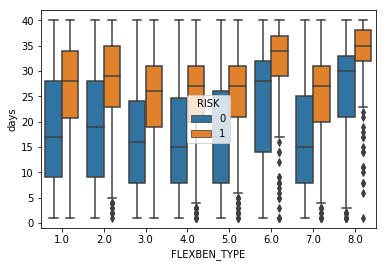

In [22]:
sns.boxplot(x='FLEXBEN_TYPE', y='days', data=claims, hue='RISK')

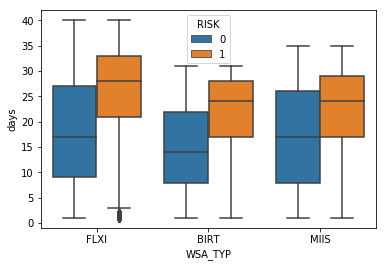

In [23]:
sns.boxplot(x='WSA_TYP', y='days', data=claims, hue='RISK')

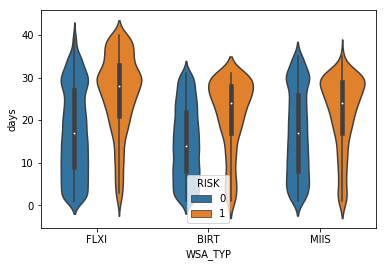

In [24]:
sns.violinplot(x='WSA_TYP', y='days', data=claims, hue='RISK')

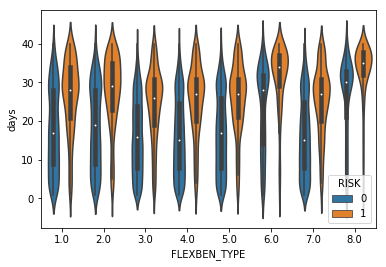

In [25]:
sns.violinplot(x='FLEXBEN_TYPE', y='days', data=claims, hue='RISK')

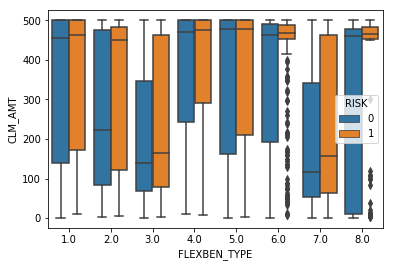

In [26]:
sns.boxplot(x='FLEXBEN_TYPE', y='CLM_AMT', data=claims, hue='RISK')

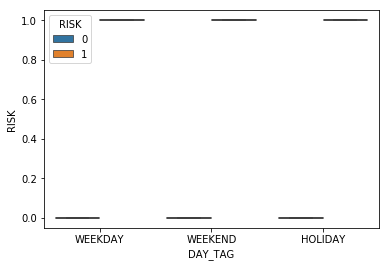

In [27]:
sns.boxplot(x='DAY_TAG', y='RISK', data=claims, hue='RISK')

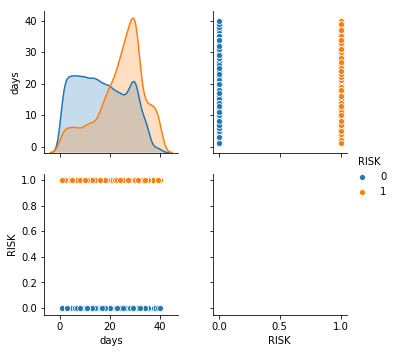

In [29]:
sns.pairplot(claims[['days','RISK', 'DAY_TAG']],hue='RISK')